In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

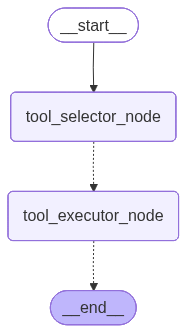

In [3]:
from multimodal_api.agent.graph import graph
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))


In [4]:
import asyncio
from langgraph.runtime import Runtime
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableConfig

from multimodal_api.agent.mcp_client import get_mcp_client
from multimodal_api.agent.state import VideoAgentState, Context

In [5]:
config = {"configurable": {"thread_id": "1"}}

async for message_chunk, metadata in graph.astream(
    {"messages": [HumanMessage(content="find me the robot from pass_the_butter_rick_and_morty")]},
    context={"mcp_client":get_mcp_client()},
    config=config,
    stream_mode="messages",
):
    if message_chunk.content:
        print(message_chunk.content, end="|", flush=True)


2025-10-30 18:39:38.391 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:42 - Tool selector invoked. Last user message: find me the robot from pass_the_butter_rick_and_morty
2025-10-30 18:39:41.469 | DEBUG    | multimodal_api.agent.nodes.tool_selector:tool_selector_node:90 - Tool selector output: 
2025-10-30 18:39:41.469 | SUCCESS  | multimodal_api.agent.nodes.tool_selector:tool_selector_node:91 - Tool chosen: get_video_clip_from_user_query
2025-10-30 18:39:41.469 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:96 - Tool Selector node token usage: (total=841)
2025-10-30 18:39:41.480 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:37 - tool_executor_node invoked. Last user message: 
2025-10-30 18:39:41.482 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:66 - Detected ToolCall → name='get_video_clip_from_user_query', args={"user_query":"find me the robot from pass_the_butter_rick_and_morty"

{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"find me the robot from pass_the_butter_rick_and_morty","video_name":"pass_the_butter_rick_and_morty"}'}
{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"find me the robot from pass_the_butter_rick_and_morty","video_name":"pass_the_butter_rick_and_morty"}'}


2025-10-30 18:39:48.927 | SUCCESS  | multimodal_api.agent.nodes.tool_executor:tool_executor_node:99 - Tool 'get_video_clip_from_user_query' executed successfully. Result: ././shared_media/8f99af12-30a6-42c8-be03-71b4a961d1ac.mp4


In [6]:
graph_output = await graph.aget_state(config=config)
graph_output

StateSnapshot(values={'messages': [HumanMessage(content='find me the robot from pass_the_butter_rick_and_morty', additional_kwargs={}, response_metadata={}, id='34ad98d3-26c8-4e06-8420-f618febfa18c'), AIMessage(content='', additional_kwargs={'reasoning_content': 'The user says: "find me the robot from pass_the_butter_rick_and_morty". They want a video clip of the robot from that episode. They are providing a natural-language query. No image. So we should use get_video_clip_from_user_query. The video_name presumably is "pass_the_butter_rick_and_morty". So we call get_video_clip_from_user_query with user_query: "robot from pass_the_butter_rick_and_morty" or "find me the robot from pass_the_butter_rick_and_morty". We\'ll pass that.', 'tool_calls': [{'index': 0, 'id': 'fc_3a202939-0dde-4ea2-b7de-5b544a99bce9', 'function': {'arguments': '{"user_query":"find me the robot from pass_the_butter_rick_and_morty","video_name":"pass_the_butter_rick_and_morty"}', 'name': 'get_video_clip_from_user_qu

In [15]:
video_path = graph_output.values['messages'][-1].content
video_path

'././shared_media/8f99af12-30a6-42c8-be03-71b4a961d1ac.mp4'

In [25]:
from pathlib import Path

# Current notebook location
notebook_dir = Path.cwd()  # if in a script, or Path.cwd() in Jupyter

# Video filename
video_name = f"{Path(video_path).stem}.{Path(video_path).suffix}"
# Path to video in mcp/src/shared_media
video_path = notebook_dir.parent.parent.parent / "multimodal-mcp" / "src" / "shared_media" / video_name

print(video_path)          # ../../mcp/src/shared_media/8f99af12-30a6-42c8-be03-71b4a961d1ac.mp4
print(video_path.exists()) # True if file exists


E:\python projects\multi-modal-rag\multimodal-api\multimodal-mcp\src\shared_media\8f99af12-30a6-42c8-be03-71b4a961d1ac..
False


In [13]:
from IPython.display import HTML

HTML(f"""
<video width="480" controls>
  <source src="{graph_output.values['messages'][-1].content}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")